In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

import anndata2ri
import rpy2
from rpy2.robjects import r


anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [3]:
organoid_gex = sc.read('../../fetal_lung/Roche/new_20230705/gut_scpoli_integration.h5ad')

In [4]:
organoid_gex.obs.derive= organoid_gex.obs.derive.astype('string')
organoid_gex.obs.loc[organoid_gex.obs.protocol=='transplant','derive'] = 'tIPS'

In [5]:
organoid_gex.obs.derive.value_counts()

IPS     305621
ASC     286675
FSC     161360
tIPS     52990
Name: derive, dtype: Int64

In [6]:
organoid_gex

AnnData object with n_obs × n_vars = 806646 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1_late', 'level_2_late', 'level_3_late'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [7]:
# map colors
col_map = pd.read_table('gut_scpoli_color.txt', header=None, index_col=0)
col_map = dict(zip(col_map.index, col_map[1]))

In [8]:
col_map['nan']='lightgray'

In [11]:
organoid_gex.uns['level_1_late_colors'] = organoid_gex.obs.level_1_late.cat.categories.map(col_map).tolist()
organoid_gex.uns['level_2_late_colors'] = organoid_gex.obs.level_2_late.cat.categories.map(col_map).tolist()
organoid_gex.uns['derive_colors'] = organoid_gex.obs.derive.cat.categories.map(col_map).tolist()

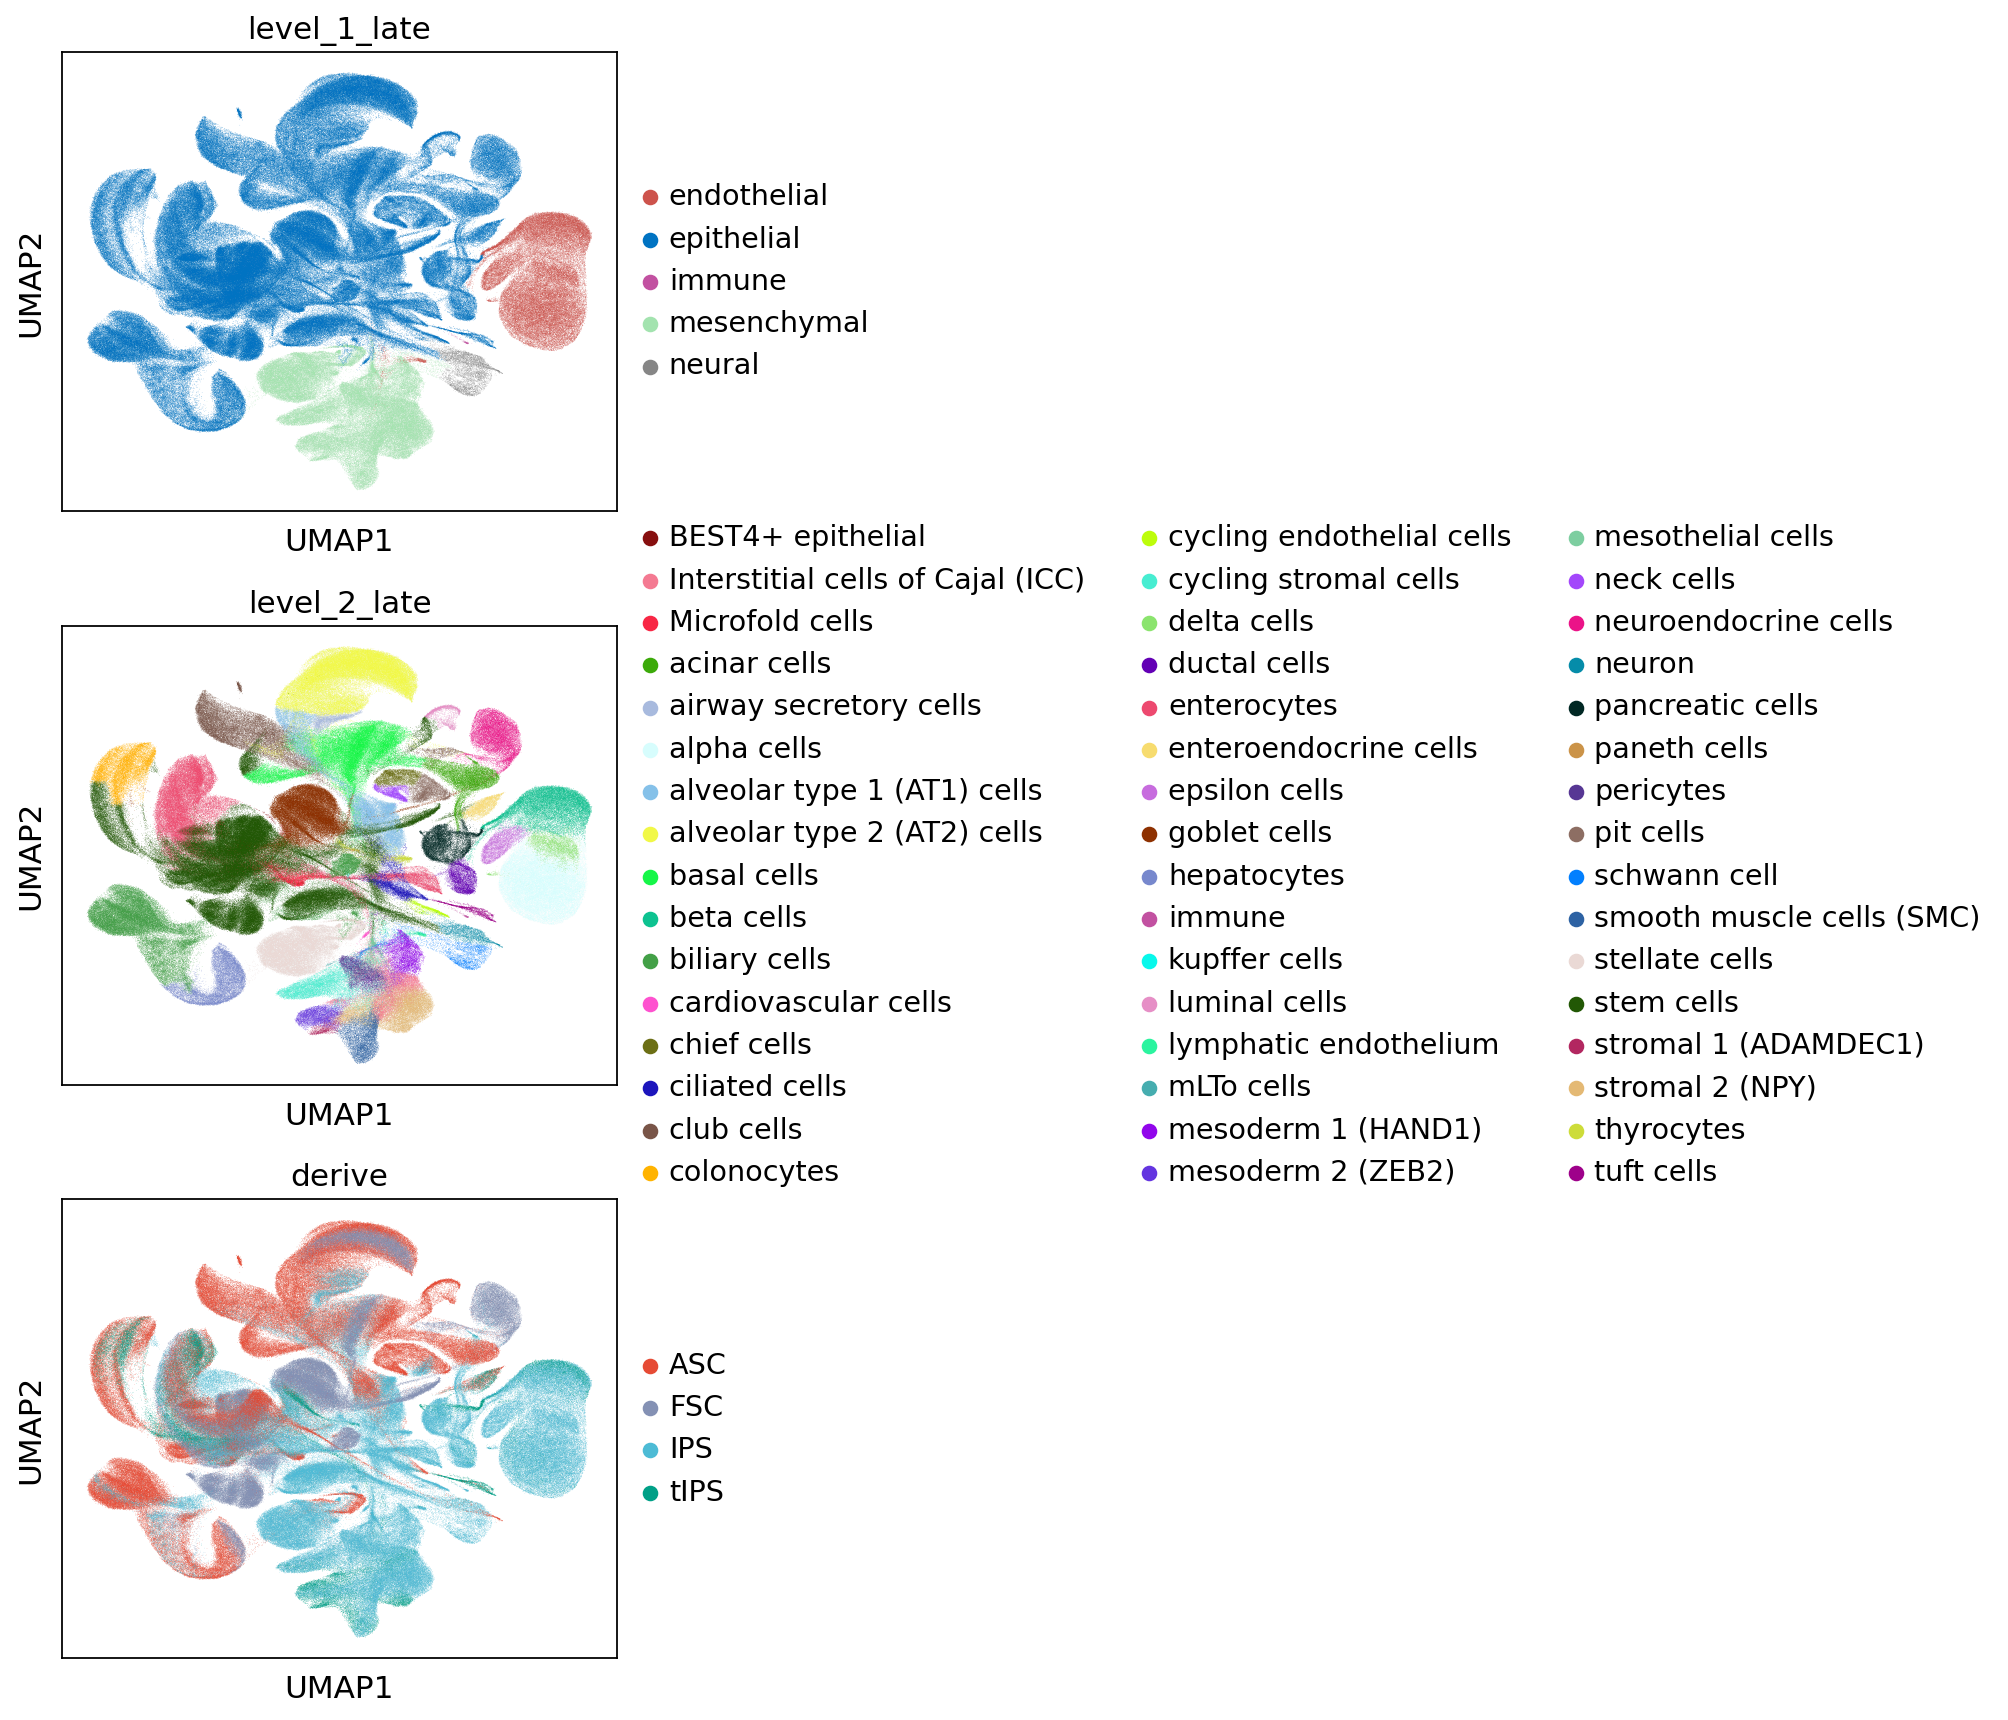

In [12]:
sc.pl.umap(organoid_gex, color = ['level_1_late','level_2_late', 'derive'], ncols=1)

In [13]:
organoid_gex = organoid_gex[organoid_gex.obs.tissue.isin(['intestine'])].copy()

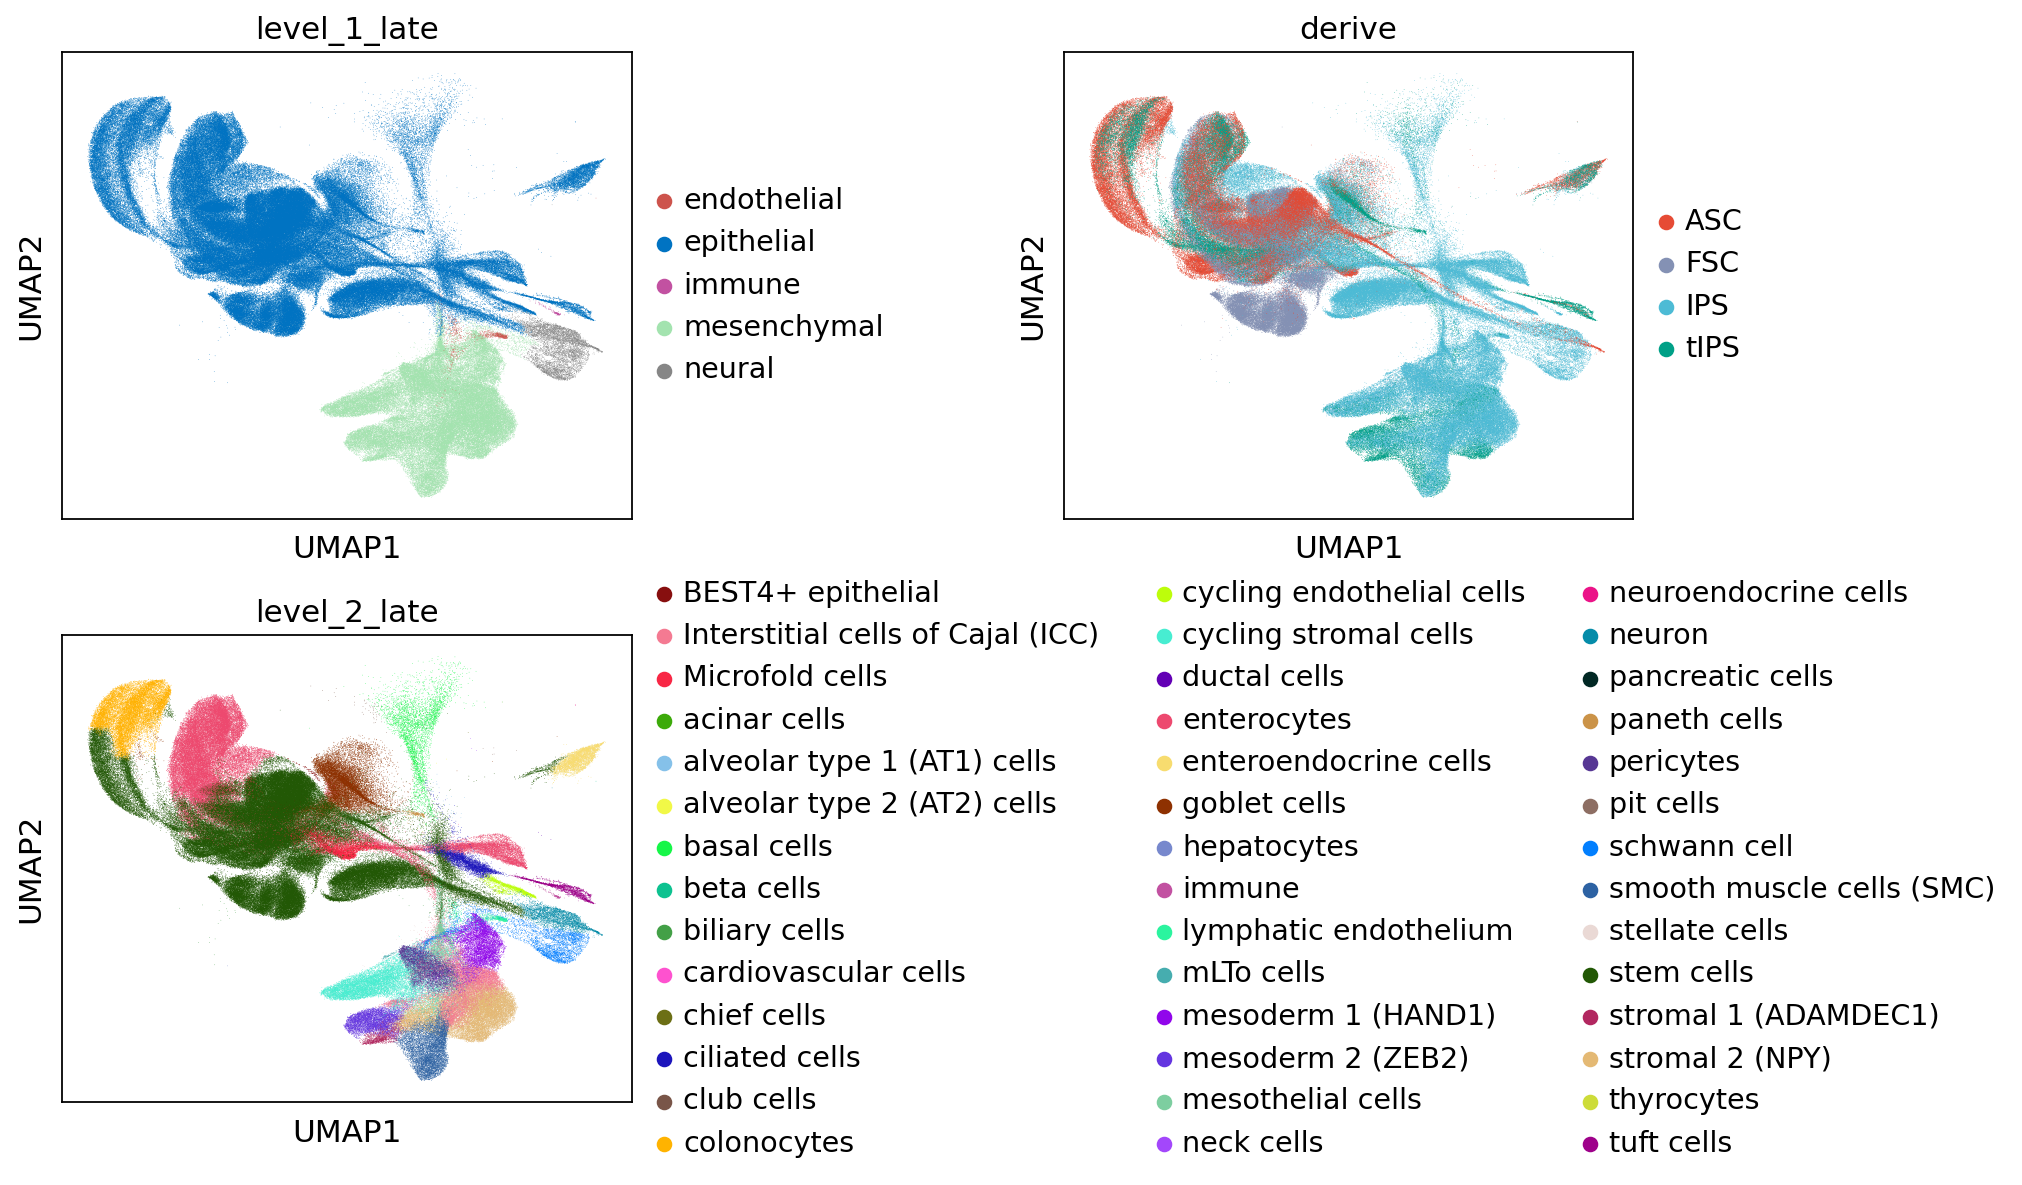

In [14]:
sc.pl.umap(organoid_gex, color = ['level_1_late','derive','level_2_late'], ncols=2, wspace = 0.6)

In [15]:
tissue_latent = sc.read('../../fetal_lung/Roche/intestine_fetal_adult_atlas/adata_latent_source.h5ad')

In [16]:
tissue_latent.uns['Cell_type_colors'] = tissue_latent.obs.Cell_type.cat.categories.map(col_map).tolist()

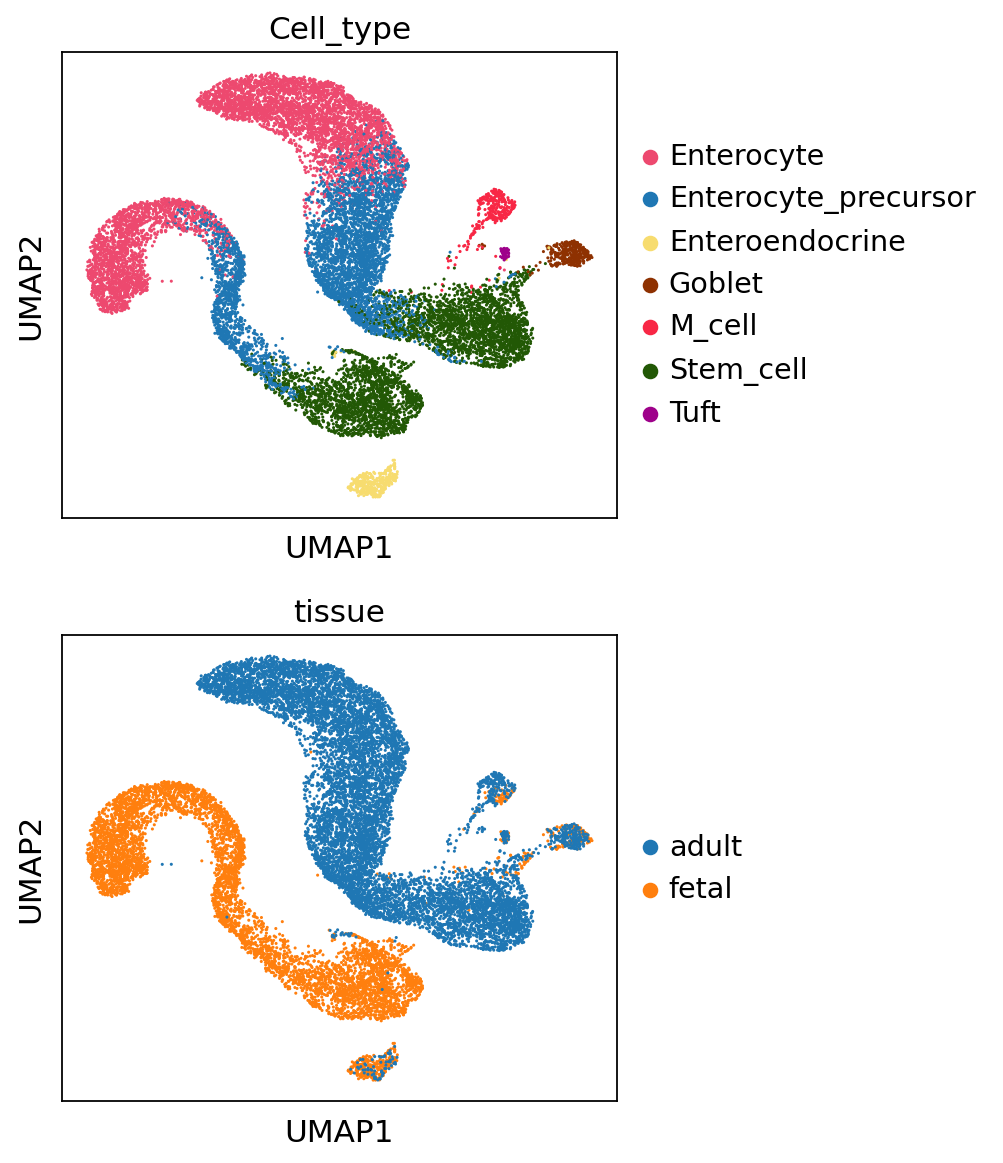

In [17]:
sc.pl.umap(tissue_latent,
           color = ['Cell_type','tissue'],
           ncols=1)

In [18]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [19]:
%%R -i organoid_gex
organoid_gex

class: SingleCellExperiment 
dim: 2000 353140 
metadata(8): hvg leiden ... level_2_late_colors derive_colors
assays(5): X ambiguous counts spliced unspliced
rownames(2000): ADAMTS9-AS2 BHLHE40-AS1 ... ZNF804A ZWINT
rowData names(6): highly_variable means ... highly_variable_nbatches
  highly_variable_intersection
colnames(353140): AAAACCGAAACA-0-0-0-17 AAAACCTTTAGT-0-0-0-17 ...
  TTTGTTGTCGTGACTA.1-207 TTTGTTGTCTGTGTGA.1-207
colData names(38): initial_size_spliced initial_size_unspliced ...
  level_2_late level_3_late
reducedDimNames(4): X_scPoli UMAP X_umap_min X_umap_sc
altExpNames(0):


### Compute Neighborhoods 

### Tissue

In [20]:
%%R
library(miloR)
library(scrabbitr)


Loading required package: edgeR
Loading required package: limma

Attaching package: ‘limma’

The following object is masked from ‘package:BiocGenerics’:

    plotMA


Attaching package: ‘edgeR’

The following object is masked from ‘package:SingleCellExperiment’:

    cpm

Loading required package: ggplot2
Loading required package: data.table
data.table 1.14.8 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com

Attaching package: ‘data.table’

The following object is masked from ‘package:SummarizedExperiment’:

    shift

The following object is masked from ‘package:GenomicRanges’:

    shift

The following object is masked from ‘package:IRanges’:

    shift

The following objects are masked from ‘package:S4Vectors’:

    first, second

Possible Ensembl SSL connectivity problems detected.
Please see the 'Connection Troubleshooting' section of the biomaRt vignette
vignette('accessing_ensembl', package = 'biomaRt')Error in curl::curl_fetch_memory(url, handle = handle) : 
 

In [21]:
%%R
t_milo <- readRDS("compare_nhoods/intestine_analysis/t_milo.rds")

In [22]:
%%R
t_milo

class: Milo 
dim: 3000 15773 
metadata(2): hvg log1p
assays(3): X counts logcounts
rownames(3000): A1BG A4GALT ... ZXDC ZZEF1
rowData names(18): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(15773): S1_AAACCTGGTCTCATCC_fetal-0
  S1_AAACCTGGTGCCTGGT_fetal-0 ... TTTGTTGAGCTCGACC-1-2-1
  TTTGTTGCATGCCGGT-1-2-1
colData names(16): sample_id Age ... n_genes tissue
reducedDimNames(1): UMAP
altExpNames(0):
nhoods dimensions(2): 15773 753
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 753
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 753 753


In [23]:
%%R
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(ggrastr))
suppressPackageStartupMessages(library(ggridges))
suppressPackageStartupMessages(library(ggalluvial))
suppressPackageStartupMessages(library(ggrepel))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


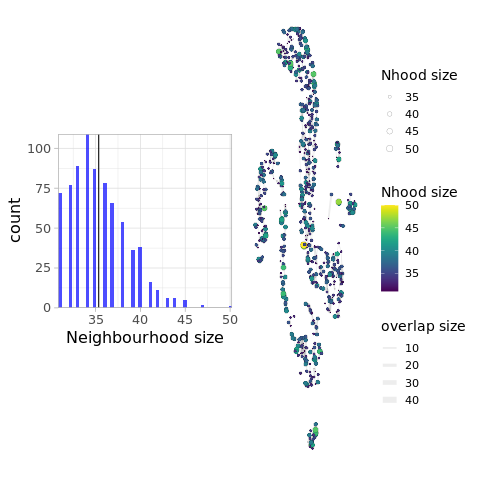

In [24]:
%%R

options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 300)

p1 <- scrabbitr::plotNhoodSizeHist(t_milo, colour="blue")
#ggsave("../plots/compare_nhoods/r_milo_nhood_size_hist.pdf", p1, width=4, height=4, dpi=300)

p2 <- plotNhoodGraph(t_milo, size_range=c(0.1,3), node_stroke=0.1) + 
scale_fill_viridis(name = "Nhood size", option = "viridis", direction = 1) 
#ggsave("../plots/compare_nhoods/r_nhood_size_graph.pdf", p2, width=6, height=5, dpi=300)

grid.arrange(p1, p2, nrow=1)

### Organoid

In [25]:
%%R
# Compute organoid neighbourhoods - FSC
o_milo <- Milo(organoid_gex[,organoid_gex$derive == 'IPS'])
o_milo <- buildGraph(o_milo, k=30, d=2, reduced.dim="UMAP")
o_milo <- makeNhoods(o_milo, prop=0.05, k=30, d=2,refined=T, reduced_dims="UMAP")

Constructing kNN graph with k:30
Checking valid object
Running refined sampling with reduced_dim
In addition: Warning message:
In (function (to_check, X, clust_centers, clust_info, dtype, nn,  :
  detected tied distances to neighbors, see ?'BiocNeighbors-ties'


In [26]:
%%R
o_milo <- buildNhoodGraph(o_milo)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


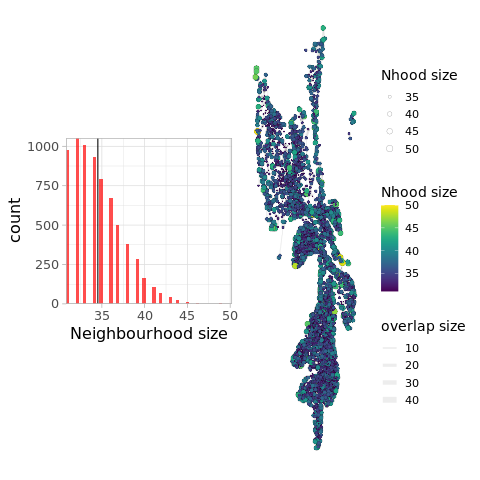

In [27]:
%%R
# Plot nhoods and size distribution
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 300)

p3 <- plotNhoodSizeHist(o_milo, colour="red")
#ggsave("../plots/compare_nhoods/m_milo_nhood_size_hist.pdf", p3, width=4, height=4, dpi=300)

p4 <- plotNhoodGraph(o_milo,size_range=c(0.1,3) ,node_stroke=0.1) + 
scale_fill_viridis(name = "Nhood size", option = "viridis", direction=1)
#ggsave("../plots/compare_nhoods/m_nhood_size_graph.pdf", p4, width=6, height=5, dpi=300)

grid.arrange(p3, p4, nrow = 1)

In [28]:
%%R
# counts(o_milo) <- assays(o_milo)[['X']] # count assay already exists
assay(o_milo, "logcounts") <- assays(o_milo)[['X']]

In [29]:
%%R
assay(o_milo, "logcounts")[1:10,1:10]

10 x 10 sparse Matrix of class "dgCMatrix"
                                                                         
ADAMTS9-AS2 .         . .        .         .         . .        .        
BHLHE40-AS1 .         . .        .         .         . .        .        
CARMN       .         . .        .         .         . .        0.6980835
CASC15      .         . .        .         .         . 2.260063 .        
CASC19      0.5037537 . .        .         .         . .        .        
CDKN2B-AS1  0.5037537 . .        .         .         . .        .        
CRNDE       0.8371797 . .        .         0.3622694 . .        .        
CYTOR       .         . .        0.6790035 .         . .        .        
DNM3OS      .         . 1.565888 0.6790035 .         . .        .        
DRAIC       .         . .        .         .         . .        .        
                              
ADAMTS9-AS2 .         .       
BHLHE40-AS1 .         .       
CARMN       1.0214238 .       
CASC15      .      

  [[ suppressing 10 column names ‘AAACCTGAGACTAAGT-64’, ‘AAACCTGAGCTAGTCT-64’, ‘AAACCTGAGGACAGCT-64’ ... ]]


In [30]:
%%R
assay(t_milo, "logcounts")[1:200,1:10]

200 x 10 sparse Matrix of class "dgCMatrix"
                                                                               
A1BG       .         .         .         .        .         .         .        
A4GALT     .         .         .         .        .         .         .        
AACS       .         .         0.4529639 .        .         .         .        
AADAC      1.5516312 .         1.1914556 .        .         1.4790288 1.3924382
AAK1       0.3458851 .         .         .        .         .         .        
AASS       .         0.6737291 .         .        .         .         .        
AATK       .         .         0.4529639 .        .         .         0.4082004
ABCA1      .         .         .         .        .         .         .        
ABCA2      .         .         0.4529639 .        .         .         .        
ABCA3      .         .         .         .        .         .         .        
ABCA4      .         .         .         .        .         .         .     

AHR        .         .         .         .        .         .         .        
AIF1       0.3458851 .         0.4529639 1.637039 0.6654462 .         0.4082004
AK1        .         .         .         .        .         .         .        
AK5        .         .         .         .        .         .         .        
AK8        .         .         0.4529639 .        .         0.9911536 .        
AKAP12     .         .         .         .        .         .         0.4082004
AKR1B1     .         .         0.4529639 .        .         .         .        
AKR1B10    2.0825722 1.9123875 1.3519194 1.637039 .         2.0512173 .        
AKR1C1     .         0.6737291 .         .        .         .         0.4082004
AKR1C2     .         .         .         .        .         .         .        
AKR1C3     .         .         .         .        .         0.6136550 .        
AKR1C4     .         .         .         .        .         .         .        
AKT1       .         .         .        

AADAC      0.7332246 0.7283956 .        
AAK1       .         0.2373924 .        
AASS       .         .         .        
AATK       0.7332246 0.4291016 .        
ABCA1      .         0.2373924 .        
ABCA2      .         .         .        
ABCA3      .         .         .        
ABCA4      .         .         .        
ABCA5      0.7332246 0.8500195 1.2397474
ABCA7      .         .         .        
ABCB1      .         .         .        
ABCB10     .         .         .        
ABCB9      .         .         .        
ABCC1      .         .         .        
ABCC2      0.7332246 0.2373924 .        
ABCC5      .         .         .        
ABCC8      .         .         .        
ABCG1      .         .         .        
ABCG5      0.7332246 0.2373924 .        
ABHD14A    .         0.2373924 .        
ABHD15     .         .         0.8008217
ABHD2      0.7332246 0.8500195 0.4785205
ABHD3      0.7332246 0.9584421 0.4785205
ABHD5      0.7332246 0.8500195 0.8008217
ABHD8      .    

  [[ suppressing 10 column names ‘S1_AAACCTGGTCTCATCC_fetal-0’, ‘S1_AAACCTGGTGCCTGGT_fetal-0’, ‘S1_AAACCTGGTGTAAGTA_fetal-0’ ... ]]


In [31]:
%%R
o_milo

class: Milo 
dim: 2000 145549 
metadata(8): hvg leiden ... level_2_late_colors derive_colors
assays(6): X ambiguous ... unspliced logcounts
rownames(2000): ADAMTS9-AS2 BHLHE40-AS1 ... ZNF804A ZWINT
rowData names(6): highly_variable means ... highly_variable_nbatches
  highly_variable_intersection
colnames(145549): AAACCTGAGACTAAGT-64 AAACCTGAGCTAGTCT-64 ...
  TTTGTCAAGGTCATCT-99 TTTGTCAGTTAGTGGG-99
colData names(38): initial_size_spliced initial_size_unspliced ...
  level_2_late level_3_late
reducedDimNames(4): X_scPoli UMAP X_umap_min X_umap_sc
altExpNames(0):
nhoods dimensions(2): 145549 7027
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 7027
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 7027 7027


### Run neighbourhood comparison pipeline

In [32]:
%%R
head(rownames(t_milo))

[1] "A1BG"   "A4GALT" "AACS"   "AADAC"  "AAK1"   "AASS"  


In [33]:
%%R
head(rownames(o_milo))

[1] "ADAMTS9-AS2" "BHLHE40-AS1" "CARMN"       "CASC15"      "CASC19"     
[6] "CDKN2B-AS1" 


Computing Nhood similarities based on 2k genes, since organoid data is 2k. 

In [34]:
# union of genes ?

In [35]:
%%R
# Run pipeline
out <- scrabbitr::calcNhoodSim(t_milo, o_milo, orthologs= cbind(rownames(o_milo), rownames(o_milo)) ,
                               sim_preprocessing="gene_spec", sim_measure="pearson",
                               hvg_join_type="intersection", max_hvgs=2000, 
                               export_dir = "compare_nhoods/all_organoid_analyses", 
                               verbose = TRUE)

Selecting features...
Combining features...
Averaging expression across neighbourhoods...
Computing similarity across neighbourhoods...
Exporting results...


In [36]:
%%R
saveRDS(out, "compare_nhoods/intestine_analysis/IPS_scrabbitr_out.rds")

In [37]:
%%R
names(out)

[1] "r_vals"    "m_vals"    "nhood_sim"


In [38]:
# %%R
# head(colData(o_milo))

In [39]:
%%R

# Extract neighbourhood graph
t_graph <- nhoodGraph(t_milo)
o_graph <- nhoodGraph(o_milo)

# Add nhood attributes to igraph
t_nhoodIDs <- as.numeric(vertex_attr(t_graph)$name) 
t_indCells <- colnames(t_milo)[t_nhoodIDs]

V(t_graph)$cell_name <- t_indCells
V(t_graph)$celltype <- colData(t_milo)[t_indCells, "Cell_type"]

o_nhoodIDs <- as.numeric(vertex_attr(o_graph)$name) 
o_indCells <- colnames(o_milo)[o_nhoodIDs]

V(o_graph)$cell_name <- o_indCells
V(o_graph)$celltype <- colData(o_milo)[o_indCells, "level_2_late"]

In [40]:
%%R
t_milo

class: Milo 
dim: 3000 15773 
metadata(2): hvg log1p
assays(3): X counts logcounts
rownames(3000): A1BG A4GALT ... ZXDC ZZEF1
rowData names(18): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(15773): S1_AAACCTGGTCTCATCC_fetal-0
  S1_AAACCTGGTGCCTGGT_fetal-0 ... TTTGTTGAGCTCGACC-1-2-1
  TTTGTTGCATGCCGGT-1-2-1
colData names(16): sample_id Age ... n_genes tissue
reducedDimNames(1): UMAP
altExpNames(0):
nhoods dimensions(2): 15773 753
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 753
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 753 753


In [41]:
%%R
# Calculate maximum correlations  
t_maxNhoods <- getMaxMappings(out$nhood_sim, 1, long_format=FALSE) # rabbit-mouse
o_maxNhoods <- getMaxMappings(out$nhood_sim, 2, long_format=FALSE) # mouse-rabbit
df_simFilt <- rbind(t_maxNhoods, o_maxNhoods)

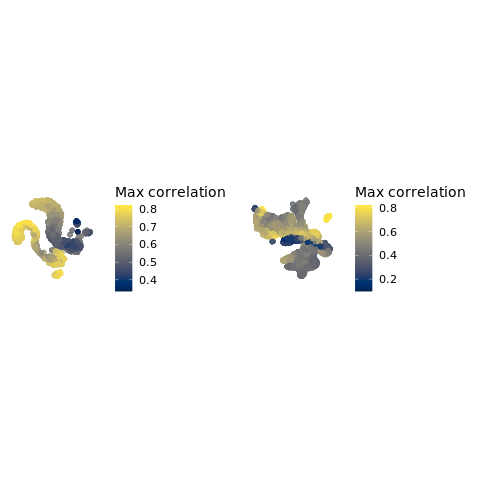

In [42]:
%%R

options(repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 300)

p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods)
p2 <- plotNhoodMaxSim(o_milo, o_maxNhoods)
grid.arrange(p1,p2,nrow=1)

ggsave("compare_nhoods/intestine_analysis/tissue_oIPS_max_corr.pdf", p1, width=10, height=8, dpi=300)
ggsave("compare_nhoods/intestine_analysis/organoid_ips_max_corr.pdf", p2, width=10, height=8, dpi=300)

In [43]:
celltypecols = organoid_gex.uns['level_2_late_colors']
celltypecols = tissue_latent.uns['Cell_type_colors']

In [45]:
%%R -i celltypecols

# print(celltypecols)

# highlight epithelial celltypes
# epi_cells = unique(t_milo$new_celltype[t_milo$big_cluster %in% c("C1",'C6')])
# t_milo$isEpi <- ifelse(t_milo$new_celltype %in% epi_cells,"Epithelial", "Non-Epithelial")

names(celltypecols) <- levels(colData(t_milo)$Cell_type)
p <- plotNhoodSimGroups(t_milo, t_maxNhoods$sim,  group_by="Cell_type",
#                         colour_by="isEpi",
                        xlabel="Correlation - PSC-derived intestine organoids",
                        ylabel="Celltype (intestine primary tissue)",size=0.15, 
                        group_colours=celltypecols, 
                        rel_min_height=0.001, show_rank = FALSE
                       )



# drop  celltype levels in empty nhoods
stat_summary <- table(p$data$group)
keep <- stat_summary > 5

p$data <- p$data[p$data$group %in% names(stat_summary)[keep],]
p$data$group <- droplevels(p$data$group)



p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
p


ggsave("compare_nhoods/intestine_analysis/ridgeplot_intestine_primaryTissue_tPSC_nhoodCorr_ann_newcelltype.pdf", p, width=10, height=12, dpi=300)

Picking joint bandwidth of 0.0235


Picking joint bandwidth of 0.0235


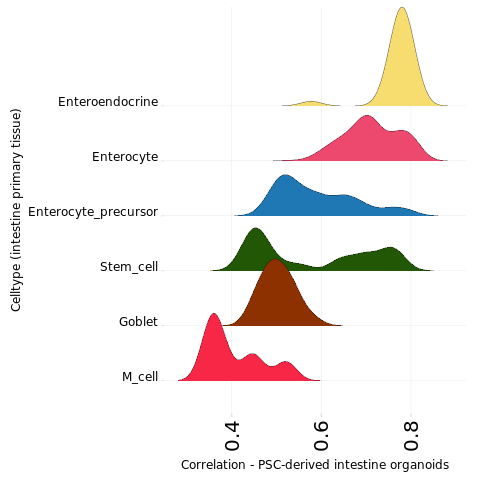

In [46]:
%%R
p